In [106]:
import csv
import re
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
def cleaned_tweets(tweet):
    # normalizacja tekstu
    temp = re.sub("\s{2,}", " ", tweet) #usunięcie podwójnych spacji
    temp = re.sub("(\r\n|\r|\n)", " ", temp) #usunięcie przerw między słowami, entery
    temp = temp.lower() #zamienia wszystkie znaki na małe litery
    temp = re.sub("rt", "", temp) #usunięcie retweetów
    temp = re.sub("&amp", "", temp) #usunięcie kodu htmlowego
    temp = re.sub("#[a-z,A-Z]*", "", temp) #usunięcie hasztagów
    temp = re.sub("@\w+", "", temp) #usunięcie wzmianek, oznaczeń, tagowań
    temp = re.sub("(f|ht)(tp)([^ ]*)", "", temp) #usunięcie urlów
    temp = re.sub("http(s?)([^ ]*)", "", temp) #usunięcie urlów
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp) #usunięcie znaków specjalnych
    temp = re.sub("\d", "", temp) #usunięcie cyfr
    temp = re.sub("\s{2,}", " ", temp) #ponowne usunięcie podwójnych spacji
    temp = re.sub("[^\w\s]", "", temp) #usunięcie znaków specjalnych
    temp = temp.strip() #usunięcie spacji lub odstępów na końcach tekstu

    return temp


In [71]:
def sentiment_analysis(tweet):
    polarity = TextBlob(tweet).sentiment.polarity
    if polarity > 0.7:
        return 'Zdecydowanie pozytywny'
    elif 0.3 < polarity <= 0.7:
        return 'Pozytywny'
    elif 0 < polarity <= 0.3:
        return 'Raczej pozytywny'
    elif -0.3 <= polarity < 0:
        return 'Raczej negatywny'
    elif -0.7 <= polarity < 0.3:
        return 'Negatywny'
    elif polarity < -0.7:
        return 'Zdecydowanie negatywny'
    else:
        return 'Neutralny'

In [123]:
def compare_tweets(csv1, csv2):
    with open(csv1, 'r', encoding='utf-8') as csv1, open(csv2, 'r', encoding='utf-8') as csv2:
        tweets1 = csv.reader(csv1)
        tweets2 = csv.reader(csv2)
        
        #Utworzenie pustych słowników do których zostaną odpowiednio przydzielone zdania po analizie sentymentu
        sentiment_counts1 = {'Zdecydowanie pozytywny': 0, 'Pozytywny': 0, 'Raczej pozytywny': 0, 'Neutralny': 0, 'Raczej negatywny': 0, 'Negatywny': 0, 'Zdecydowanie negatywny': 0}
        sentiment_counts2 = {'Zdecydowanie pozytywny': 0, 'Pozytywny': 0, 'Raczej pozytywny': 0, 'Neutralny': 0, 'Raczej negatywny': 0, 'Negatywny': 0, 'Zdecydowanie negatywny': 0}
        
        for tweet in tweets1:
            sentiment = sentiment_analysis(tweet[0])
            sentiment_counts1[sentiment] += 1
        
        for tweet in tweets2:
            sentiment = sentiment_analysis(tweet[0])
            sentiment_counts2[sentiment] += 1
        
        print('Tweety o kawie:', sentiment_counts1)
        print('Tweety o herbacie:', sentiment_counts2)
        
        # Wykres kołowy dla danych o kawie
        labels1 = list(sentiment_counts1.keys())
        values1 = list(sentiment_counts1.values())

        fig1, ax1 = plt.subplots()
        wedges1, _ = ax1.pie(values1, labels=None, startangle=90)

        # Tworzenie połączeń kreskowych z ramkami dla danych o kawie
        bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1)
        kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")
        for i, wedge in enumerate(wedges1):
            ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang)
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax1.annotate(labels1[i] + f' ({values1[i]/sum(values1)*100:.1f}%)', xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                         horizontalalignment=horizontalalignment, **kw, bbox=bbox_props)

        ax1.set_aspect('equal')
        ax1.set_title('Tweety o kawie')

        plt.show()
        
        # Wykres kołowy dla danych o herbacie
        labels2 = list(sentiment_counts2.keys())
        values2 = list(sentiment_counts2.values())

        fig1, ax1 = plt.subplots()
        wedges1, _ = ax1.pie(values2, labels=None, startangle=90)

        # Tworzenie połączeń kreskowych z ramkami dla danych o herbacie
        bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1)
        kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")
        for i, wedge in enumerate(wedges1):
            ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang)
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax1.annotate(labels2[i] + f' ({values2[i]/sum(values2)*100:.1f}%)', xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                         horizontalalignment=horizontalalignment, **kw, bbox=bbox_props)

        ax1.set_aspect('equal')
        ax1.set_title('Tweety o herbacie')

        plt.show()

In [76]:
#Odczytanie pliku CSV coffee_tweets
coffee_tweets = pd.read_csv('dane_tweet/coffee_tweets.csv', sep=';')

#Oczyszczenie tekstu w kolumnie z tweetami
coffee_tweets['text'] = coffee_tweets['text'].apply(cleaned_tweets)

#Zapisanie oczyszczonych tweetów do nowego pliku CSV
coffee_tweets[['text']].to_csv('dane_tweet/coffee_tweets_cleaned.csv', index=False)

In [75]:
#Odczytanie pliku CSV tea_tweets
tea_tweets = pd.read_csv('dane_tweet/tea_tweets.csv', sep=';', encoding = 'ISO-8859-1')

#Oczyszczenie tekstu w kolumnie z tweetami
tea_tweets['text'] = tea_tweets['text'].apply(cleaned_tweets)

#Zapisanie oczyszczonych tweetów do nowego pliku CSV
tea_tweets[['text']].to_csv('dane_tweet/tea_tweets_cleaned.csv', index=False)

Tweety o kawie: {'Zdecydowanie pozytywny': 38, 'Pozytywny': 174, 'Raczej pozytywny': 208, 'Neutralny': 0, 'Raczej negatywny': 82, 'Negatywny': 491, 'Zdecydowanie negatywny': 8}
Tweety o herbacie: {'Zdecydowanie pozytywny': 57, 'Pozytywny': 220, 'Raczej pozytywny': 137, 'Neutralny': 0, 'Raczej negatywny': 45, 'Negatywny': 541, 'Zdecydowanie negatywny': 1}


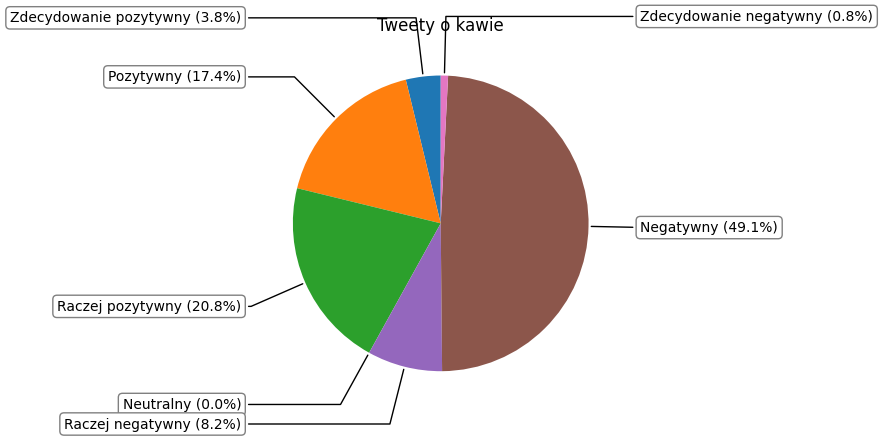

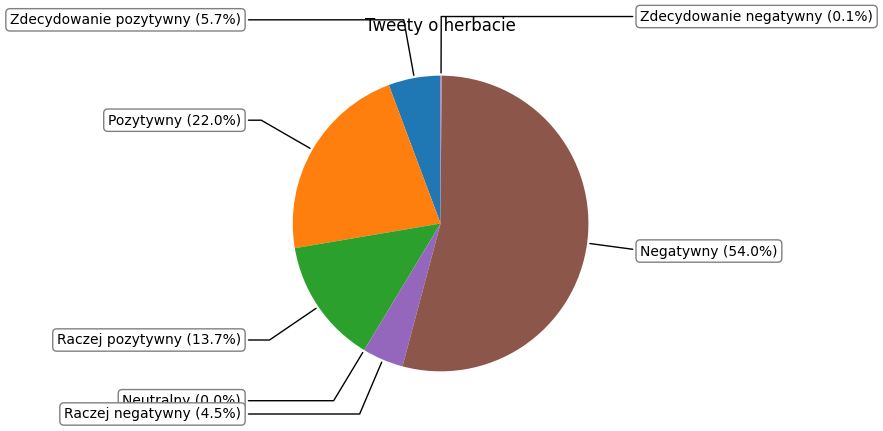

In [124]:
compare_tweets('dane_tweet/coffee_tweets_cleaned.csv', 'dane_tweet/tea_tweets_cleaned.csv')